# Financial Inclusion in Africa


The data for this project is gotten the "Financial Inclusion in Africa" Competition on Zindi.

###### Tasks:
- Data ingestion
- Exploratory Data Analysis (EDA)

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warning messages (if any)
import warnings
warnings.filterwarnings('ignore')

# Always display plots in this notebook
%matplotlib inline


# Set theme for seaborn plots

# sns.set_style(style = 'whitegrid')
# sns.set_style('darkgrid')
sns.set_theme(style="darkgrid", font_scale=1.3)
sns.color_palette("mako", as_cmap=True)

## Data ingestion

In [2]:
# Load the dataset
train = pd.read_csv('data/train.csv')
variables = pd.read_csv('data/VariableDefinitions.csv', names=["feature", "description"], header=0)


In [3]:
# See feature description


# variables

# for row in variables.iterrows():
#     print(row[1][0])

for row in variables.itertuples():
    print(f"<*** {row.feature} ***>  \n {row.description}  \n")

<*** country ***>  
 Country interviewee is in.  

<*** year ***>  
 Year survey was done in.  

<*** uniqueid ***>  
 Unique identifier for each interviewee  

<*** location_type ***>  
 Type of location: Rural, Urban  

<*** cellphone_access ***>  
 If interviewee has access to a cellphone: Yes, No  

<*** household_size ***>  
 Number of people living in one house  

<*** age_of_respondent ***>  
 The age of the interviewee  

<*** gender_of_respondent ***>  
 Gender of interviewee: Male, Female  

<*** relationship_with_head ***>  
 The interviewee’s relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know  

<*** marital_status ***>  
 The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don’t know  

<*** education_level ***>  
 Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training,

In [4]:
# See the shape of the datasets
print("Rows & columns in train data", train.shape)

Rows & columns in train data (23524, 13)


In [5]:
# Get basic information on the dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [6]:
# See a sample of the dataset
train.sample(2)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
12389,Rwanda,2016,uniqueid_6322,No,Rural,Yes,3,57,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
20533,Tanzania,2017,uniqueid_5731,No,Urban,Yes,2,39,Female,Head of Household,Married/Living together,Primary education,Self employed


In [7]:
# Check for duplicates
print('Duplicates in train data:', train.duplicated().sum(), '\n')

Duplicates in train data: 0 



In [8]:
# Convert the year column to a object(string) datatype
train['year'] = train['year'].astype('object')

### Exploratory Data Analysis (EDA)

In [9]:
# List of features
print(list(train.columns))

['country', 'year', 'uniqueid', 'bank_account', 'location_type', 'cellphone_access', 'household_size', 'age_of_respondent', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']


In [10]:
# Use "train" dataset for EDA and Predictive Analytics

# Drop irrelevant column(s)
data = train.drop(columns=["uniqueid"])

In [11]:
# Get names of the Categorical and Continuous features

# cat_columns = data.select_dtypes(include='object').columns
cat_columns = data.select_dtypes(exclude='number').columns
num_columns = data.select_dtypes(include='number').columns

In [12]:
# num_columns

In [13]:
# Compute and display stats for categorical features

# cat_stats = pd.DataFrame(columns = ['feature', 'unique_values', 'unique_count', 'num_missing', 'pct_missing'])
cat_stats = pd.DataFrame(columns = ['feature', 'unique_count', 'num_missing', 'pct_missing'])
tmp = pd.DataFrame()

# compute and store column stats in the cats_stats dataframe
for col in cat_columns:
    tmp['feature'] = [col]
#     tmp['unique_values'] = [data[col].unique()]
    tmp['unique_count'] = int(data[col].nunique())
    tmp['num_missing'] = data[col].isnull().sum()
    tmp['pct_missing'] = (data[col].isnull().sum() / len(train)).round(3)*100
    
    #  Append new stats row to stats dataframe
    cat_stats = cat_stats.append(tmp)
    
# Sort cat_stats dataframe by the number of unique values(distinct categories) in ascending order
cat_stats.sort_values(by = 'unique_count', inplace = True, ascending = True)

# Set the index to categorical feature(column) names
cat_stats.set_index('feature', inplace = True)


In [14]:
cat_stats

,unique_count,num_missing,pct_missing
feature,,,
bank_account,2,0,0.0
location_type,2,0,0.0
cellphone_access,2,0,0.0
gender_of_respondent,2,0,0.0
year,3,0,0.0
country,4,0,0.0
marital_status,5,0,0.0
relationship_with_head,6,0,0.0
education_level,6,0,0.0


###### Numerical features stats

In [15]:
# Compute and display stats for numerical features

# for col in num_columns:
#     num_missing = data[col].isnull().sum()
#     pct_missing = (data[col].isnull().sum() / len(data)).round(3)*100
    
#     print(f"'{col}' column has {pct_missing}% missing values")
    


num_stats = pd.DataFrame(columns = ['feature', 'skew', 'kurtosis', 'num_missing', 'pct_missing'])
tmp = pd.DataFrame()

# compute and store column stats in the cats_stats dataframe
for col in num_columns:
    tmp['feature'] = [col]
    # tmp['unique_values'] = [data[col].unique()]
    tmp['skew'] = data[col].skew()
    tmp['kurtosis'] = data[col].kurtosis()
    tmp['num_missing'] = data[col].isnull().sum()
    tmp['pct_missing'] = (data[col].isnull().sum() / len(train)).round(3)*100
    
    #  Append new stats row to stats dataframe
    num_stats = num_stats.append(tmp)
    
# Sort num_stats dataframe by the number of pct_missing(% of missing values) in ascending order
num_stats.sort_values(by = 'pct_missing', inplace = True, ascending = True)

# Set the index to numerical feature(column) names
num_stats.set_index('feature', inplace = True)

In [16]:
num_stats

,skew,kurtosis,num_missing,pct_missing
feature,,,,
household_size,0.988200,1.313302,0,0.0
age_of_respondent,0.841686,0.100138,0,0.0


In [17]:
# Show statistical summary of numerical variables
data.describe()

,household_size,age_of_respondent
count,23524.000000,23524.000000
mean,3.797483,38.805220
std,2.227613,16.520569
min,1.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


In [18]:
# Show statistical summary of categorical variables
data.describe(include='object')

,country,year,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524,23524,23524,23524,23524,23524,23524,23524,23524
unique,4,3,2,2,2,2,6,5,6,10
top,Rwanda,2016,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,8735,20212,14343,17454,13877,12831,10749,12791,6437


***Initial Observations***


- No missing values in the datasets
- No duplicates 


In [19]:
# #  Function to plot visualizations for univariate analysis
# def univariate_plot(df, hue = None):
#     '''
#     This funtion will plot visualizations for categorical and continuous features in provided dataframe(df)
    
#     Categorical - Count plot
#     Continuous  - Distribution & Box plots
    
#     df: data in a dataframe
    
#     '''
    
#     # Get names of the Categorical and Continuous features
#     cat_columns = df.select_dtypes(include='object').columns
#     num_columns = df.select_dtypes(include='number').columns
    
    
#     # Plot visualizations for numerical features
#     for col in num_columns:
#         fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 5))
        
#         ax[0].set_title("Distribution Plot")
# #         sns.distplot(df[col], ax=ax[0])
#         sns.histplot(data=df, x = col, ax=ax[0], bins=10)
        
                
#         ax[1].set_title("Density Plot")
#         sns.kdeplot(data = df, x=col, ax=ax[1], hue = hue)
        
#         ax[2].set_title("Box Plot")
#         sns.boxplot(data = df, x=col, ax=ax[2])

    
#     fig.tight_layout()  
#     plt.show()
    
#     # Plot visualizations for categorical features
#     for col in cat_columns:
#         # fig, ax = plt.subplots(figsize=(10, 5))
#         fig, ax = plt.subplots(figsize=(7, 4))
        
#         # ax.set_title("Count Plot")
#         # sns.countplot(data = df, x=col, hue = hue, ax=ax)
#         sns.countplot(data = df, y=col, hue = hue, ax=ax)
        
#         # plt.xticks(rotation=45)
    
#     fig.tight_layout()  
#     plt.show()

In [20]:
def analyze_num(data, univariate=True, hue = None):
    '''
    This funtion will plot visualizations for continuous/numeric features in provided dataframe(data)
    
    univariate  - Distribution & Box plots
    
    
    data: data in a dataframe
    
    '''
    
    if univariate:
        
        # Plot univariate visualizations for numerical features
        for col in num_columns:
            fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5))

            ax[0].set_title("Distribution Plot")
            sns.distplot(data[col], ax=ax[0], bins=10)
#             sns.histplot(data=data, x = col, ax=ax[0], bins=10)

            ax[1].set_title("Box Plot")
            sns.boxplot(data = data, x=col, ax=ax[1])


        fig.tight_layout()  
        plt.show()
        
    else:
    
        # Plot bivariate/multivariate visualizations for numerical features
        for col in num_columns:
            fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 5))

            ax[0].set_title("Distribution Plot")
            sns.histplot(data=data, x=col, ax=ax[0], bins=10, hue=hue, multiple="stack")


            ax[1].set_title("Density Plot")
            sns.kdeplot(data = data, x=col, ax=ax[1], hue = hue)
            

            ax[2].set_title("Box Plot")
            sns.boxplot(data = data, x=col, y=hue, ax=ax[2])


        fig.tight_layout()  
        plt.show()

In [21]:
def analyze_cat(data, univariate=True, hue = None):
    '''
    This funtion will plot visualizations for categorical features in provided dataframe(data)
    
    univariate - Count plot
    
    
    data: data in a dataframe
    
    '''
    
    if univariate:
        # Plot univariate visualizations for categorical features
        for col in cat_columns:
            # fig, ax = plt.subplots(figsize=(10, 5))
            fig, ax = plt.subplots(figsize=(7, 4))

            ax.set_title("Unique Categories Count")
            # sns.countplot(data = data, x=col, ax=ax)
            sns.countplot(data = data, y=col, ax=ax)

            # plt.xticks(rotation=45)

        fig.tight_layout()  
        plt.show()
    
    else:
        # Plot bivariate/multivariate visualizations for categorical features
        for col in cat_columns:
            # fig, ax = plt.subplots(figsize=(10, 5))
            fig, ax = plt.subplots(figsize=(7, 4))

            # ax.set_title("Count Plot")
            # sns.countplot(data = data, x=col, hue = hue, ax=ax)
            sns.countplot(data = data, y=col, hue = hue, ax=ax)

            # plt.xticks(rotation=45)

        fig.tight_layout()  
        plt.show()


In [22]:
# # Univariate Analysis

# univariate_plot(data, hue = 'bank_account')
# # univariate_plot(data)
# # univariate_plot(data, hue = 'cellphone_access')

### Univariate Analysis

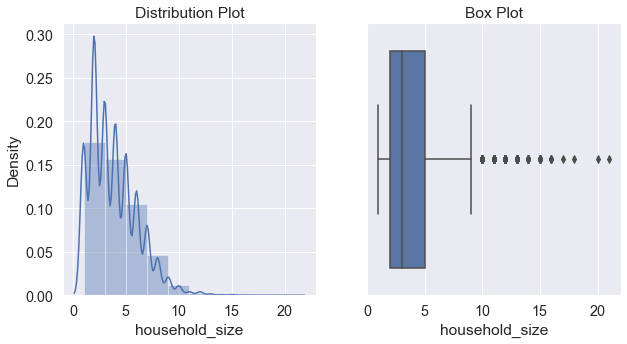

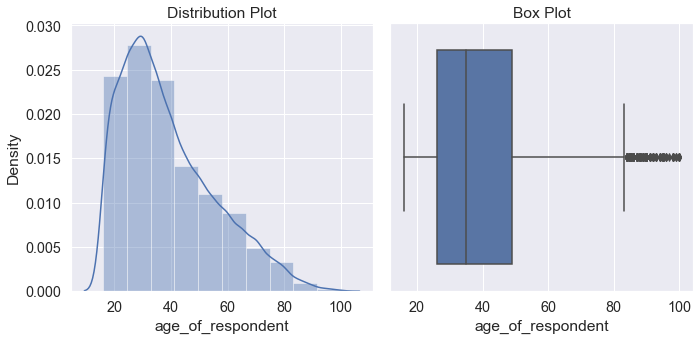

In [23]:
# Analyze numerical features
analyze_num(data)

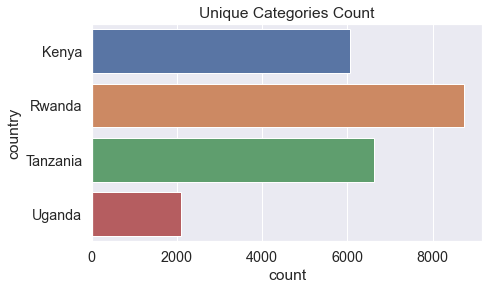

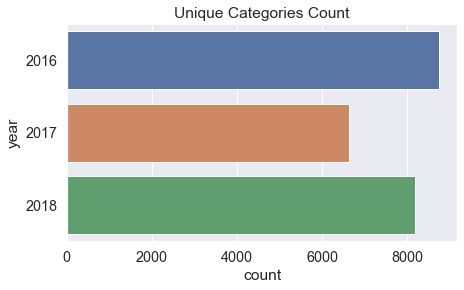

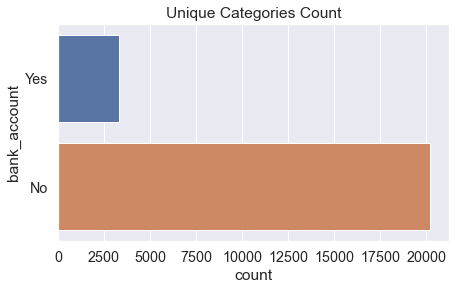

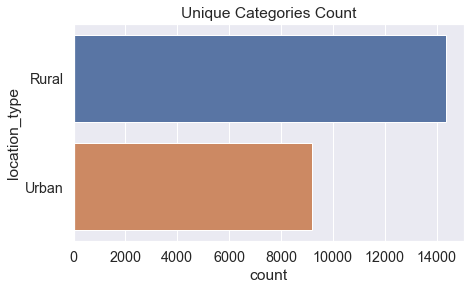

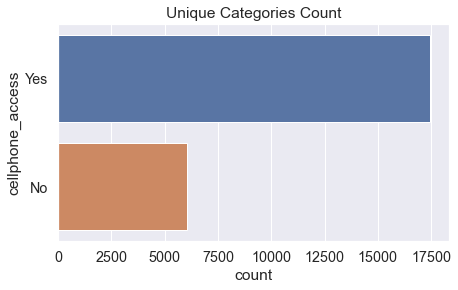

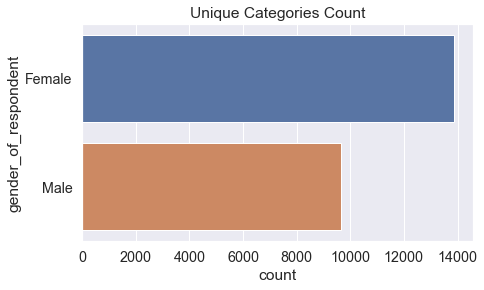

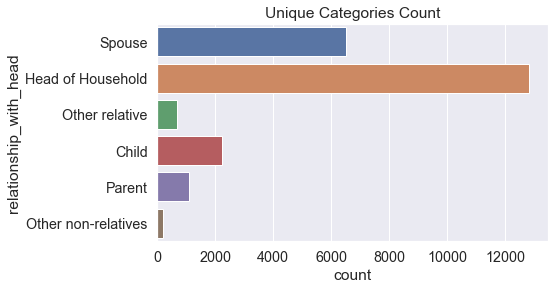

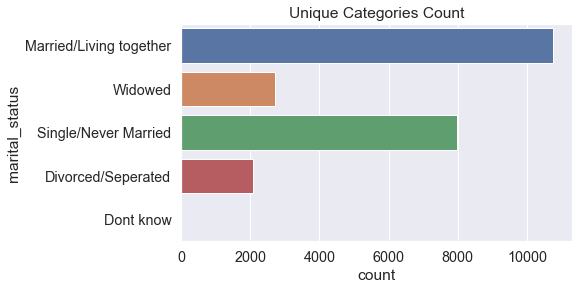

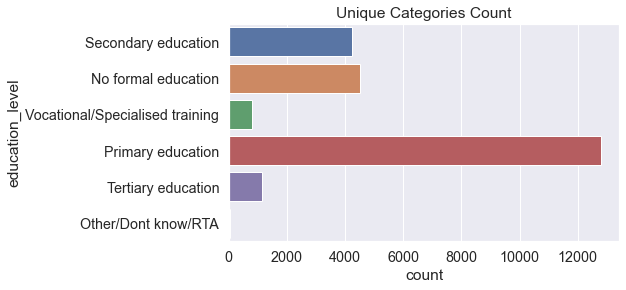

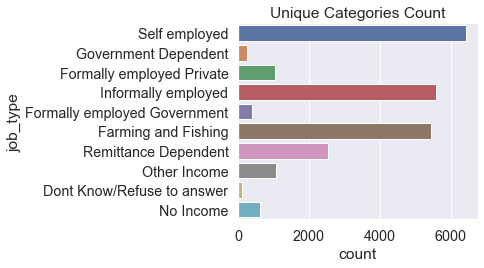

In [24]:
# Analyze categorical features
analyze_cat(data)

***Observations***

- ***household size*** and ***age of respondents*** are both skewwed to the right and have a lognormal distribution 
- There is a class imbalance in the target (***bank account***) feature


### Bivariate/Multivariate Analysis

In [25]:
# Import association_metrics
import association_metrics as am

# from pandas.plotting import scatter_matrix

In [26]:
# analyze_num(data[num_columns])

# analyze_num(data, univariate=False, hue='bank_account')

# univariate_plot(data, hue = 'bank_account')
# univariate_plot(data)
# univariate_plot(data, hue = 'cellphone_access')

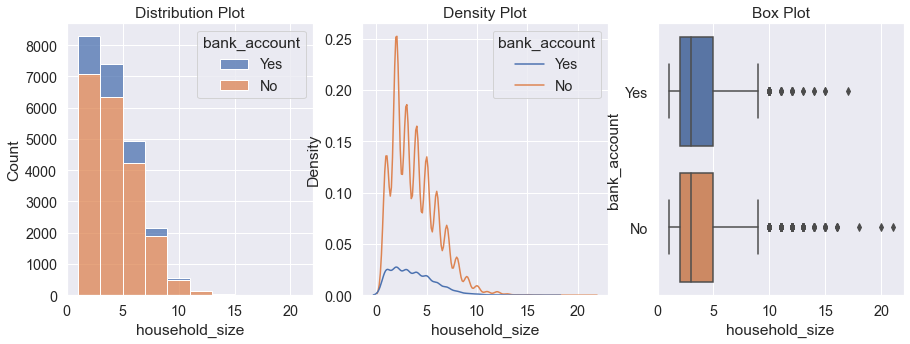

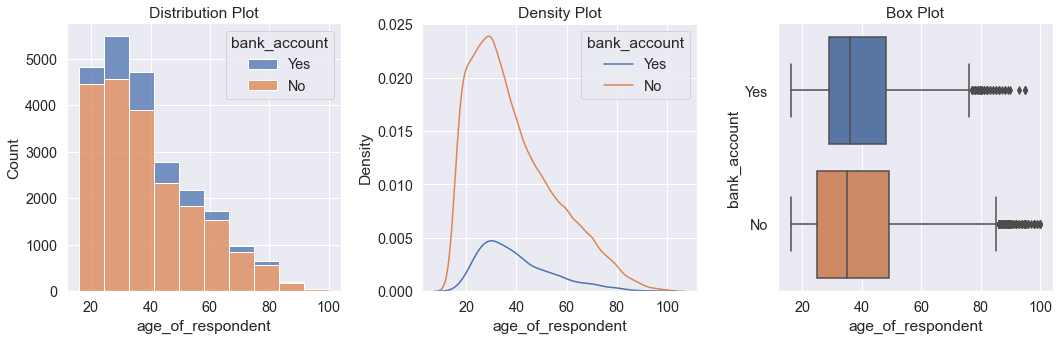

In [27]:
# Analyze numerical features
analyze_num(data, univariate=False, hue='bank_account')

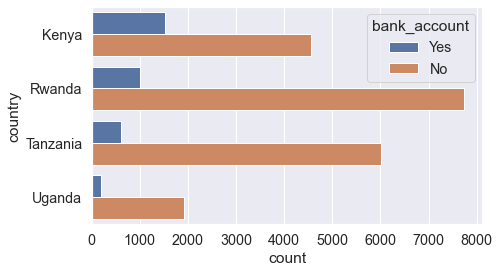

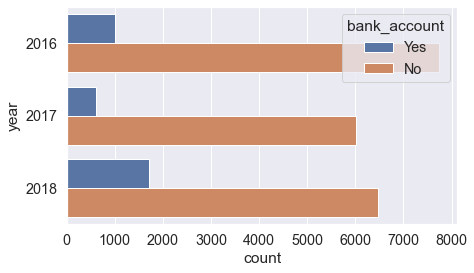

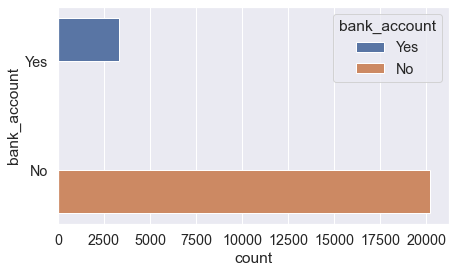

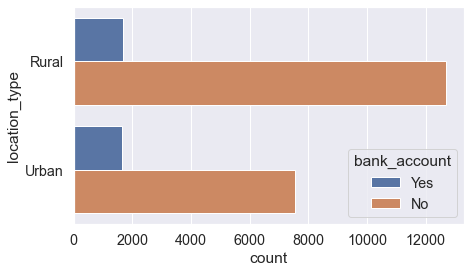

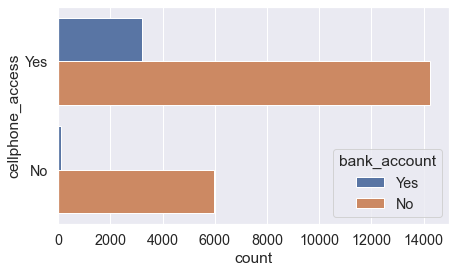

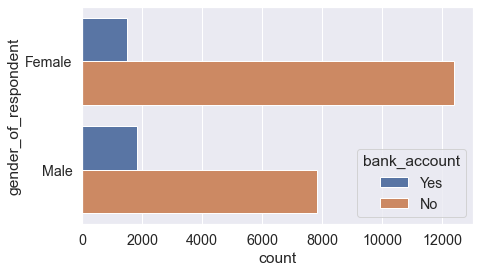

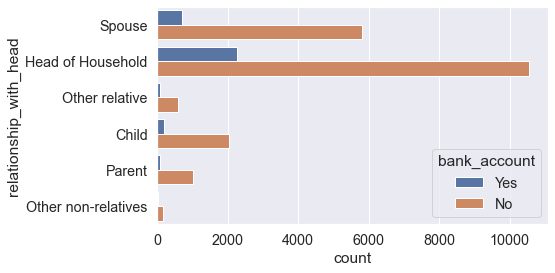

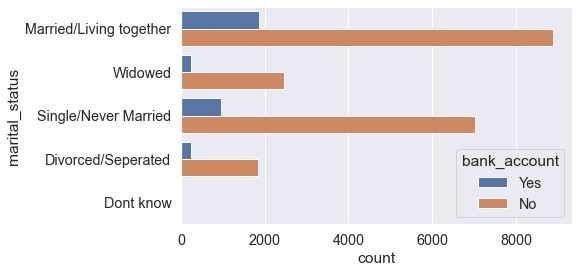

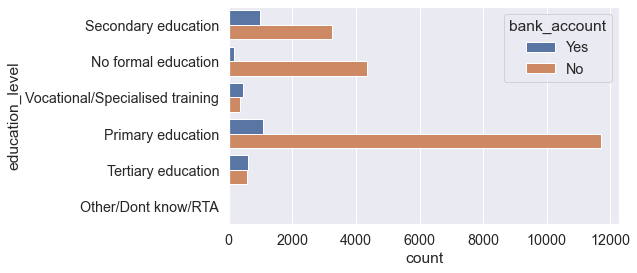

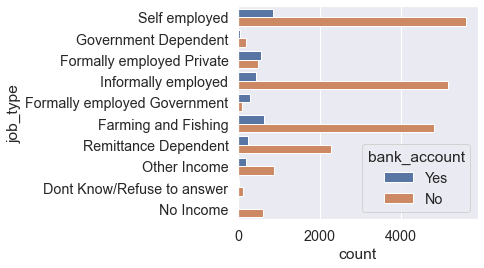

In [28]:
# Analyze categorical features
analyze_cat(data, univariate=False, hue='bank_account')

###### Percentage of unique values in each categorical feature

In [44]:
# [f"{tup[0]} - {tup[1]} " for tup in val_pct.index]

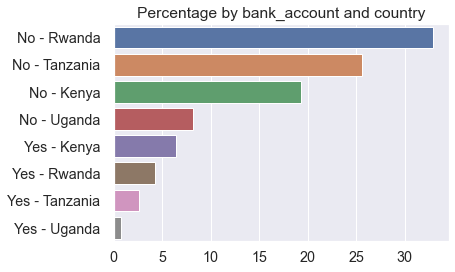

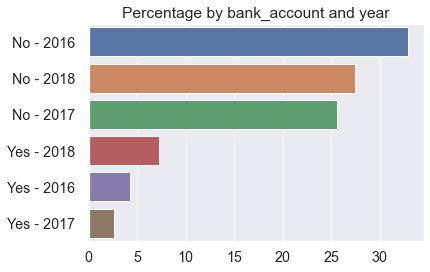

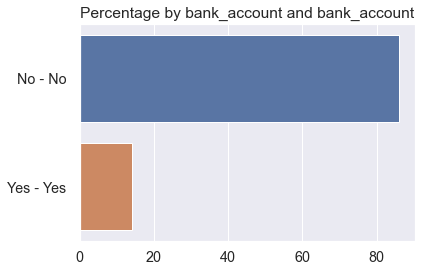

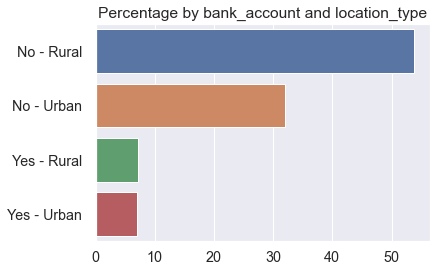

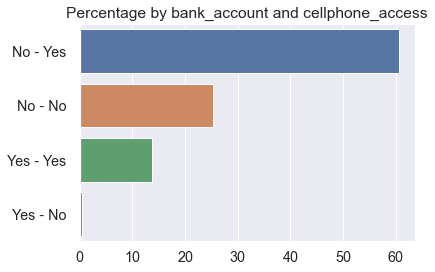

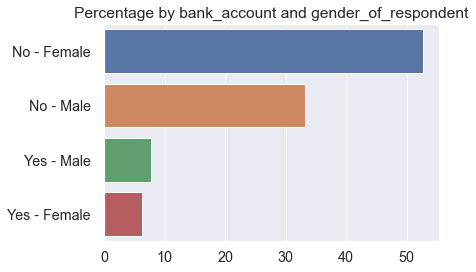

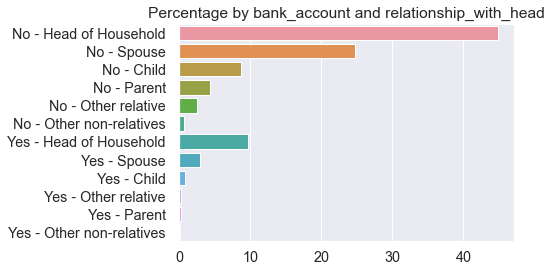

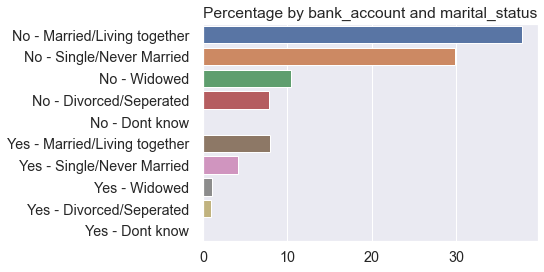

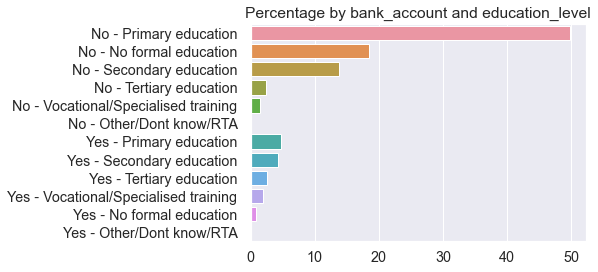

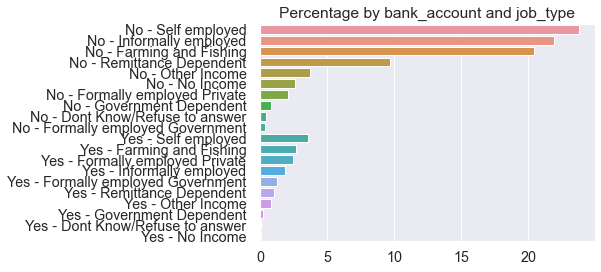

In [45]:
for col in cat_columns:
    category = col.replace('_', ' ')
    
#     val_pct = (data[col].value_counts()*100/len(data)).round(2)
    val_pct = (data.groupby('bank_account')[col].value_counts()*100/len(data)).round(2)
#     val_pct.plot(kind='bar', orient="v")
    sns.barplot(x=val_pct.values, y=[f"{tup[0]} - {tup[1]} " for tup in val_pct.index])
    
#     plt.ylabel(f"bank_account, {col}")

    plt.title(f"Percentage by bank_account and {col}")
    plt.show()
    
#     print('Category: ', category)
#     print(val_pct,  '\n')
    

***Observations***

- Almost everyone without ***cellphone access*** do not have a bank account
- ***Cellphone access***, position in household (***Head of Household***, ***Spouse***) may be significant to predicting bank account ownership
- ***Gender*** and ***location*** may not be significant to predicting bank account ownership
- Having no formal education may mean "no bank account"
- Instances with don't know/refuse to answer(RTA) reponses to ***marital status, education level and jobtype*** appear insignificant to ***bank account*** ownership and may be dropped. 



In [139]:
data.corr()

,household_size,age_of_respondent
household_size,1.000000,-0.129729
age_of_respondent,-0.129729,1.000000


In [45]:
# Initialize a Cramer's V object using the dataset

# cramersv = am.CramersV(data.astype("category"))
cramersv = am.CramersV(data[cat_columns].astype("category"))


# Get correlation in a pairwise matrix filled with Cramer's V, where columns and index are 
# the categorical variables of the dataset
correlation = cramersv.fit()

In [ ]:
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

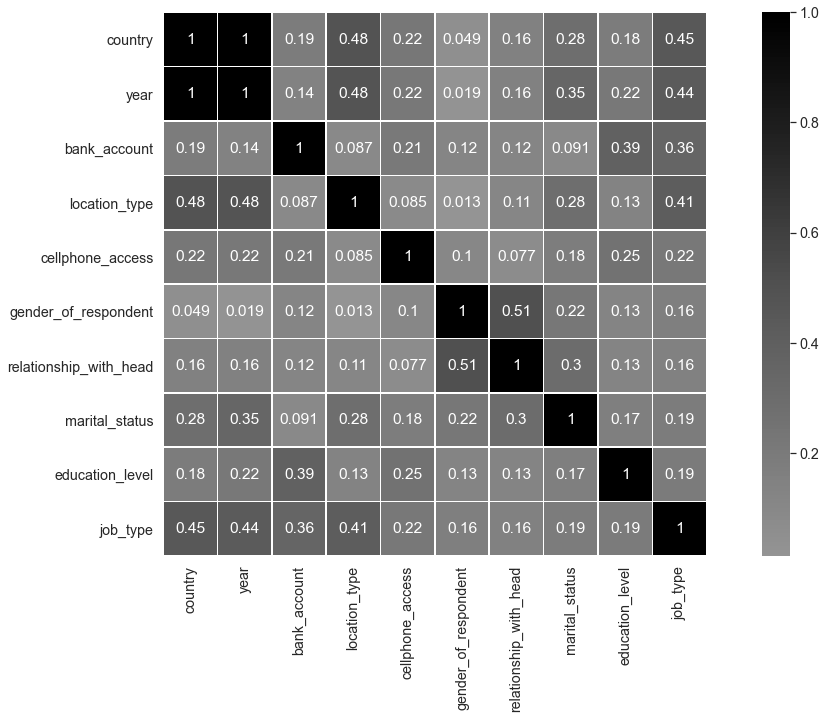

In [198]:
# Show the degree of association
fig,ax = plt.subplots(figsize=(20,10))

# sns.heatmap(correlation, vmax=1.0, cmap="Greys", linewidths=0.5, fmt='.2f', annot=True, annot_kws={'size': 10}, square=True, center=0)
sns.heatmap(correlation, vmax=1.0, cmap="Greys", linewidths=0.5, fmt='.2f', annot=True, square=True, mask=mask, center=0)
plt.show()

In [182]:
# correlation
# data.columns

***Observations***

1. Correlation with target (***bank account***)
- ***none*** - location_type, marital_status
- ***weak*** - country, year, cellphone_access, gender_of_respondent, relationship_with_head
- ***moderate*** - education_level, job_type






### Conclusion

Things to consider for predictive and inferential analytics process

1. Drop features with no/trivial relationship with the target (bank account)

2. Drop country and year as they are not suited for the FIA problem and their perfect correlation can affect some regression based models

3. Drop one/both of 'gender_of_respondent' and 'relationship_with_head' for their strong correlation but weak relationship with the target

4. Drop instances with don't know/refuse to answer(RTA) reponses to ***marital status, education level and jobtype***

5. Transform the numeriacal/continuous features from a lognormal to normal distribution for algorithms that require this to perform better, determine significance of the data etc



NameError: name 'hue' is not defined

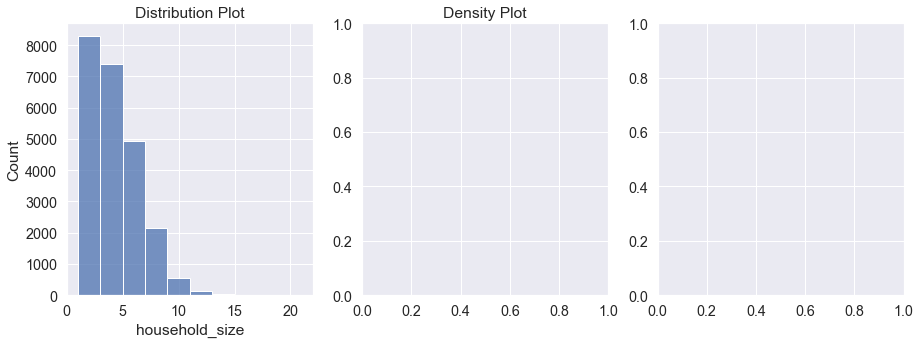

In [47]:
# for col in cat_columns:
#     # fig, ax = plt.subplots(figsize=(10, 5))
#     fig, ax = plt.subplots(figsize=(7, 4))

#     # ax.set_title("Count Plot")
#     # sns.countplot(data = data, x=col, hue = hue, ax=ax)
#     sns.countplot(data = data, y=col, hue = hue, ax=ax)

#     # plt.xticks(rotation=45)

# fig.tight_layout()  
# plt.show()

nrows = 3
ncols = 3

for col in num_columns:
    fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 5))

    ax[0].set_title("Distribution Plot")
#         sns.distplot(df[col], ax=ax[0])
    sns.histplot(data=data, x = col, ax=ax[0], bins=10)


    ax[1].set_title("Density Plot")
    sns.kdeplot(data = data, x=col, ax=ax[1], hue = hue)

    ax[2].set_title("Box Plot")
    sns.boxplot(data = data, x=col, ax=ax[2])


fig.tight_layout()  
plt.show()